# Анализ оттока клиентов регионального банка 

**Ссылка на презентацию:**  
https://disk.yandex.ru/i/UJojjFa5QPvK5Q

Сохранение клиентов является одной из приоритетных задач любой компании, в том числе банка. В рамках решения этой задачи важно своевременно выявить тех клиентов, которые по каким-то причинам собираются уйти, и определить среди них ценных, которых важно удержать. 

**Заказчик** - менеджер из отдела маркетинга регионального банка.

**Цель исследования** - провести анализ клиентов регионального банка и выделить сегменты клиентов, склонных к оттоку, подготовить рекомендации по удержанию клиентов.

**Задачи**:

- проанализировать основные признаки, влияющие на отток;
- сформировать типичные портреты клиентов, в том числе с разбивкой на ушедших и оставшихся;
- проверить статистические гипотезы
- выделить сегменты на основе значимых признаков отточности
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами, выделив целевые группы клиентов.

**Результат** оформить в виде презезентации с понятными и интерпретируемыми графиками и лаконичными, но емкими выводами.

**Описание данных**

Датасет содержит данные о клиентах банка. Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

USERID — идентификатор пользователя,

score — баллы кредитного скоринга,

city — город,

gender — пол,

age — возраст,

equity — количество баллов собственности

balance — баланс на счёте,

products — количество продуктов, которыми пользуется клиент,

credit_card — есть ли кредитная карта,

last_activity — активный клиент,

EST_SALARY — оценочный доход клиента,

сhurn — признак оттока.

## Загрузка и обзор данных 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

import numpy as np
from scipy import stats as st

In [2]:
pip install phik

     |████████████████████████████████| 686 kB 1.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import phik
from phik.report import plot_correlation_matrix

In [4]:
df = pd.read_csv('/datasets/bank_scrooge.csv')

In [5]:
# Функция для вывода общей информации о датасете
def get_inf (df):
    print('Первые 5 строк датасета')
    display(df.head())
    print('Размер датасета')
    display(df.shape)
    print('Общая информация')
    display(df.info())
    print('Доля пропусков от всего датасета')
    display(df.isna().mean().sort_values(ascending=False))
    print('Дубликаты строк')
    display(df.duplicated().sum());

In [6]:
# Применнение функции для вывода общей информации о датасете
get_inf(df)

Первые 5 строк датасета


USERID  score       city gender   age  equity     balance  products  \
0  183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1  146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2  120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3  225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4  157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  EST_SALARY  churn  
0            0              1    75719.14      1  
1            1              0    86621.77      0  
2            1              1   107683.34      0  
3            0              1   174423.53      1  
4            1              0    67353.16      1

Размер датасета


(10000, 12)

Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


None

Доля пропусков от всего датасета


balance          0.2295
age              0.0026
USERID           0.0000
score            0.0000
city             0.0000
gender           0.0000
equity           0.0000
products         0.0000
credit_card      0.0000
last_activity    0.0000
EST_SALARY       0.0000
churn            0.0000
dtype: float64

Дубликаты строк


0

В датасете 10 000 строк, 12 столбцов. 

Есть нарушение стиля в заголовках. 

Столбец age имеет формат float из-за пропусков. Столбец score имеет формат float, но данные целочисленные, от 642 до 1000 баллов.

Есть пропуски в двух столбцах balance и age. В balance пропусков почти 23%, что много. 

Дубликатов строк не обнаружено.



## Предобработка данных

### Название столбцов

In [7]:
# Приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

# Проверим
df.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

Названия столбцов приведены к единому стилю.

### Пропуски

In [8]:
df.isna().sum().sort_values(ascending=False)

balance          2295
age                26
userid              0
score               0
city                0
gender              0
equity              0
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

26 строк без данных о возрасте клиента. В соответстви  с 115-ФЗ банк в рамках идентификации клиентов обязан получать данные в том числе о дате рождения клиента. Соответственно, отсутствие возраста скорее всего техническая ошибка. Можно удалить эти строки, т.к. они составляют менее 1% данных.

Строк с отсутствующими данными о балансе значительно больше, почти 23%. Удалить нельзя. Рассмотрим их подробнее.

In [9]:
# Зафиксируем количество строк до удаления:
df_rows_count = df.shape[0]

# Удаляем строки с отсутствующими данными о возрасте
df = df.dropna(subset =['age'])


In [10]:
# Строки с отсутствующими данными о балансе
df.query('balance.isna()')

userid  score       city gender   age  equity  balance  products  \
2     120722  892.0    Рыбинск      Ж  30.0       0      NaN         1   
9     133130  906.0  Ярославль      Ж  67.0       0      NaN         1   
10    148929  927.0     Ростов      М  52.0       0      NaN         1   
11    172184  921.0     Ростов      М  41.0       0      NaN         1   
19    127034  922.0    Рыбинск      Ж  53.0       0      NaN         1   
...      ...    ...        ...    ...   ...     ...      ...       ...   
9976  208085  876.0     Ростов      М  38.0       0      NaN         1   
9984  125941  729.0  Ярославль      Ж  42.0       0      NaN         1   
9993  219924  884.0    Рыбинск      Ж  36.0       0      NaN         1   
9996  139170  894.0  Ярославль      М  46.0       0      NaN         1   
9997  115639  903.0  Ярославль      М  24.0       0      NaN         2   

      credit_card  last_activity  est_salary  churn  
2               1              1   107683.34      0  
9               0              1   238055.53      0  
10              1              1   196820.07      0  
11              1              1   217469.48      0  
19              0              0   147094.82      0  
...           ...            ...         ...    ...  
9976            0              0   171763.69      0  
9984            1              1   687538.70      0  
9993            1              1   169844.88      0  
9996            1              0   196898.29      0  
9997            1              1   108905.09      0  

[2279 rows x 12 columns]

In [11]:
df.query('balance.isna()')['churn'].value_counts()

0    2266
1      13
Name: churn, dtype: int64

Большинство строк с отсутствующим балансом - действующие клиенты, в том числе активные и имеющие кредитные карты. Сложно предположить ситуацию, когда банк не обладает информацией о балансе карты действующего клиента. По всей видимости, пропуски связаны с техническими ошибками, возможно, при выгрузке данных. Хотя, может быть, лимит кредитной карты не учитывается в балансе. Это стоило бы уточнить в банке. Пропуски заполнять не будем.

### Дубликаты

На этапе обзора данных было выявлено, что дубликаты строк отсутствуют. Проверим частичные и неявные дубликаты.

In [12]:
df['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

Неявных дубликатов в наименовании городов нет. В датасете представлены клиенты трех городов регионального банка: Ярославль, Рыбинск, Ростов.

In [13]:
df['gender'].unique()

array(['Ж', 'М'], dtype=object)

Дубликатов по полу не обнаружено

In [14]:
# Дубликаты по идентификатору пользователя
df[df.duplicated(subset=['userid'], keep=False)].sort_values(by = 'userid')

userid  score       city gender   age  equity      balance  products  \
1893  116540  883.0    Рыбинск      Ж  55.0       1    362756.49         3   
7694  116540  887.0  Ярославль      Ж  38.0       0          NaN         1   
4866  117943  855.0    Рыбинск      Ж  32.0       6   1036832.93         4   
7542  117943  880.0  Ярославль      Ж  40.0       0          NaN         1   
5863  120258  908.0    Рыбинск      Ж  38.0       4   2213581.63         2   
...      ...    ...        ...    ...   ...     ...          ...       ...   
2302  220816  934.0    Рыбинск      Ж  74.0       5   1294285.39         3   
2597  226719  990.0  Ярославль      М  37.0       4  14648692.14         2   
4216  226719  903.0    Рыбинск      Ж  63.0       0          NaN         1   
8205  227795  840.0    Рыбинск      М  34.0       2    350768.03         1   
8497  227795  839.0  Ярославль      М  34.0       2    326593.14         2   

      credit_card  last_activity  est_salary  churn  
1893            0              1   175920.48      1  
7694            0              1   119247.61      0  
4866            1              1   107792.71      1  
7542            1              0   137718.93      0  
5863            0              1   160327.77      1  
...           ...            ...         ...    ...  
2302            1              0    95606.80      0  
2597            0              0   934412.61      1  
4216            1              0   138582.58      0  
8205            1              0   102036.14      1  
8497            1              0   103314.92      0  

[100 rows x 12 columns]

Достаточно много дубликатов по идентификатору пользователя. 

In [15]:
df[df.duplicated(subset=['userid'], keep=False)]['city'].unique()

array(['Ярославль', 'Рыбинск'], dtype=object)

Дублируются клиенты Рыбинска и Ярославля. Клиентов Ростова в дубликатах нет.

In [16]:
df[df.duplicated(subset=['userid', 'city'], keep=False)]

Empty DataFrame
Columns: [userid, score, city, gender, age, equity, balance, products, credit_card, last_activity, est_salary, churn]
Index: []

Дубликатов в рамках одного филиала нет.

In [17]:
df[df.duplicated(subset=['userid', 'gender', 'age'], keep=False)]

userid  score       city gender   age  equity     balance  products  \
3274  155765  863.0  Ярославль      М  30.0       5  1036114.50         5   
5197  155765  923.0    Рыбинск      М  30.0       0         NaN         1   
8205  227795  840.0    Рыбинск      М  34.0       2   350768.03         1   
8497  227795  839.0  Ярославль      М  34.0       2   326593.14         2   

      credit_card  last_activity  est_salary  churn  
3274            1              1   150744.50      1  
5197            1              1   120296.60      0  
8205            1              0   102036.14      1  
8497            1              0   103314.92      0

У клиентов с дублирующимся userid может быть разный пол и возраст, так что это не клиенты, сменившие филиал. Всего два клиента с дублирующимися userid имеют одинаковый пол и возраст, скорее всего это случайное совпадение.

In [18]:
df[df.duplicated(subset=['userid'], keep=False)]['churn'].value_counts()

0    50
1    50
Name: churn, dtype: int64

Распределение отточных и оставшихся клиентов среди дубликатов по userid 50 на 50. Возможно, повторные userid выдаются новым клиентам после закрытия счетов старым. Хотя в реальной практике это сомнительно. Банк обязан хранить информацию о клиентах пять лет после закрытия счетов. У нас нет никаких данных о датах в предоставленном датасете. Эту информацию можно было бы уточнить в бэк-офисе банка, но в рамках проекта такой возможности нет.
Проверим, действительно ли в каждой паре дубликатов один клиент действующий, а другой ушедший.

In [19]:
df[df.duplicated(subset=['userid', 'churn'], keep=False)]

Empty DataFrame
Columns: [userid, score, city, gender, age, equity, balance, products, credit_card, last_activity, est_salary, churn]
Index: []

Похоже, в данном региональном банке действительно повторно присваивают userid ушедших клиентов новым. Для анализа отточности нам нужны и ушедшие, и оставшиеся клиенты. Удалять дубликаты нельзя. Менять userid тоже смысла нет - он не влияет на показатели отточности.

### Типы данных

In [20]:
# Заменим на целочисленный тип данных в столбцах данных о баллах кредитного скоринга и возраста
df[['score', 'age']] = df[['score', 'age']].astype('int')

# userid приведем к текстовому типу
df['userid'] = df['userid'].astype('str')

#Проверим
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9974 non-null   object 
 1   score          9974 non-null   int64  
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int64  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1013.0+ KB


Типы данных в столбцах заменены.

In [21]:
# Количество строк в датасете после обработки и расчет доли данных, оставшихся после фильтрации
df_rows_count_after = df.shape[0]
f'Осталось {df_rows_count_after/df_rows_count:.2%} изначальных данных'

'Осталось 99.74% изначальных данных'

**Вывод по разделу**

В предоставленном для анализа датасете 10 000 строк, 12 столбцов. Обнаружено нарушение стиля в заголовках, неверный формат данных некоторых столбцов, неполные дубликаты, пропуски в данных в двух столбцах. 

Строки с пропусками в столбце age удалены, строки с пропусками в столбце balance оставлены. Большинство строк с отсутствующим балансом - действующие клиенты, в том числе активные и имеющие кредитные карты. Прирора пропусков скорее всего техническая.

Дубликатов строк нет. Обнаружены неполные дубликаты по userid. Все дубликаты по userid из Ярославля и Рыбинска. Дубликаты по userid не являются дубликатами клиентов, т.к. большинство пар различаются по полу и возрасту. В каждой паре дубликатов один клиент действующий, а другой ушедший. По всей видимости банк присваивает id ушедших клиентов новым в другом филиале. Насколько это нормально с точки зрения учета необходимо уточнить в бэк-офисе банка.

Названия столбцов были приведены к нижнему регистру. Преобразованы типы данных в столбцах score и age к целочисленному, userid - в текстовый формат.

После предобработки осталось 9974 строки, что составляет более 99% изначальных данных, что достаточно для анализа.

## Исследовательский анализ данных

###  Средние/медианные значения и стандартные отклонения признаков

In [22]:

df.describe().T.style.format({'max':'{:,.2f}', 
                              'mean':'{:,.2f}', 
                              'std':'{:,.2f}', 
                              'min':'{:,.2f}', 
                              '25%':'{:,.2f}', 
                              '50%':'{:,.2f}', 
                              '75%':'{:,.2f}', 
                              'count':'{:.0f}'})

Есть клиенты с количеством продуктов, равным 0. Это странно. Нужно отдельно проверить таких клиентов. 

In [23]:
# Отфильтруем строки по клиентам, у которых количество продуктов равно 0
df.query('products == 0')

userid  score     city gender  age  equity  balance  products  \
8957  147837    962  Рыбинск      Ж   79       3      NaN         0   

      credit_card  last_activity  est_salary  churn  
8957            0              0    25063.96      1

Один странный отточный клиент с неизвестным балансом по счету и  без кредитной карты. Можно удалить, т.к. такой клиент один. Все-таки, если клиент является клиентом банка, у него должен быть хотя бы один продукт.

In [24]:
# Удаляем строку с products=0
df = df.query('products > 0')

# Количество строк в датасете после обработки и расчет доли данных, оставшихся после фильтрации
df_rows_count_after = df.shape[0]
f'Осталось {df_rows_count_after/df_rows_count:.2%} изначальных данных'

'Осталось 99.73% изначальных данных'

Данных для анализа достаточно. Посмотрим на обновленные статистические показатели.

In [25]:
df.describe().T.style.format({'max':'{:,.2f}', 
                              'mean':'{:,.2f}', 
                              'std':'{:,.2f}', 
                              'min':'{:,.2f}', 
                              '25%':'{:,.2f}', 
                              '50%':'{:,.2f}', 
                              '75%':'{:,.2f}', 
                              'count':'{:.0f}'})

Диапазон баллов кредитного скоринга от 642 до 1000. Средний балл равен 848,67, что почти совпадает с медианным значением в 853. Большинство клиентов набирают от 802 до 900 баллов кредитного скоринга. Стандартное отклонение равно 65.

Возраст клиентов варьируется от 18 до 86. Большинство клиентов банка - люди в возрасте от 33 лет до 51 года. Средний и медианный возраст почти совпадают - около 40 лет. Средний немного выше из-за возрастных пенсионеров. Стандартное отклонение - 12 лет.

Количество баллов собственности у клиентов от 0 до 9, у основной массы клиентов - не больше 4, чаще всего 3.

Баланс на счете клиентов датасета от 0 до 119 млн, у основной массы клиентов - менее 1 млн. По данному показателю среднее и медианное значения отличаются значительно: медианное значение - около 500 тыс, среднее - 800 тыс. Такое различие связано с частью клиентов, имеющих большой остаток по счету (выбросы), за счет которых происходит сдвиг среднего в большую сторону. Разброс значений по данному показателю большой, стандартное отклонение составляет почти 2 млн.

Количество продуктов, которыми пользуется клиент, может доходить до 5, большинство клиентов пользуются двумя продуктами, это же количество является средним и медианным значением. 

Большинство клиентов банка имеют кредитные карты (68%) и являются активными клиентами (52%).

Оценочный доход клиента согласно данным датасета варьируется от2,5 тыс до 1,4 млн. Доход большей части клиентов попадает в диапазон от 75 тыс до 174,5 тыс. За счет клиентов с высокими доходами среднее значение (147,8 тыс) ощутимо выше медианного (119,6 тыс). Стандартное отклонение большое - более 139 тыс.

Доля активных клиентов - 52%.

**Средний отток по банку составляет 18%.**

In [26]:
df_city = df.groupby('city', as_index=False)['userid'].count().sort_values(by='userid',ascending=False)
df_city

city  userid
2  Ярославль    5875
1    Рыбинск    2682
0     Ростов    1416

Больше всего клиентов в Ярославле.

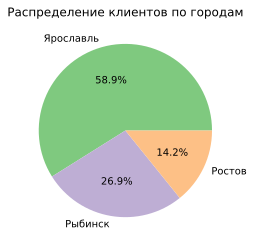

In [27]:
# Построение круговой диаграммы
colors = sns.color_palette('Accent')

plt.pie(df_city['userid'], labels = df_city['city'], colors = colors, autopct='%1.1f%%')
plt.title('Распределение клиентов по городам')
plt.show()

В Ростове немногим более 14% клиентов, даже в Рыбинске почти вдвое больше.

In [28]:
df_gender = df.groupby('gender', as_index=False)['userid'].count().sort_values(by='userid',ascending=False)
df_gender

gender  userid
1      М    4991
0      Ж    4982

Практически одинаковое количество мужчин и женщин среди клиентов банка.

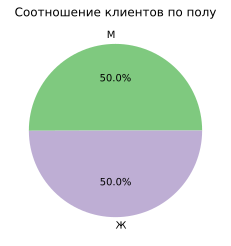

In [29]:
# Построение круговой диаграммы

plt.pie(df_gender['userid'], labels = df_gender['gender'],colors = colors, autopct='%1.1f%%')
plt.title('Соотношение клиентов по полу')
plt.show()

В относительных величинах мужчин и женщин среди клиентов банка одинаково.

In [30]:
df_last_activity = (df.groupby('last_activity', as_index=False)['userid']
                    .count()
                    .sort_values(by='userid',ascending=False)
                   )
df_last_activity

last_activity  userid
1              1    5215
0              0    4758

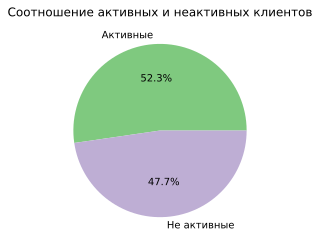

In [31]:
# Структура по активности
plt.pie(df_last_activity['userid'], labels = ['Активные', 'Не активные'],colors = colors, autopct='%1.1f%%')
plt.title('Соотношение активных и неактивных клиентов')
plt.show()

Активных клиентов немного больше

In [32]:
df_credit_card = (df.groupby('credit_card', as_index=False)['userid']
                    .count()
                    .sort_values(by='userid',ascending=False)
                   )
df_credit_card

credit_card  userid
1            1    6784
0            0    3189

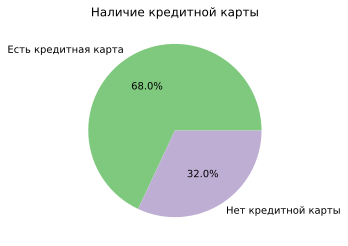

In [33]:
# Структура по наличию кредитной

plt.pie(df_credit_card['userid'], labels = ['Есть кредитная карта', 'Нет кредитной карты'],colors = colors, autopct='%1.1f%%')
plt.title('Наличие кредитной карты')
plt.show()

68% клиентов оформили кредитную карту в банке.

In [34]:
df_churn = (df.groupby('churn', as_index=False)['userid']
                    .count()
                    .sort_values(by='userid',ascending=False)
                   )
df_churn

churn  userid
0      0    8155
1      1    1818

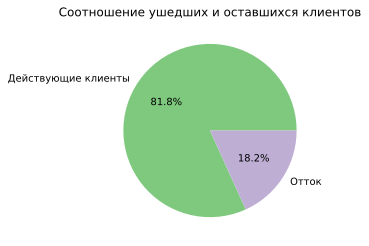

In [35]:
# Структура по активности
plt.pie(df_churn['userid'], labels = ['Действующие клиенты', 'Отток'],colors = colors, autopct='%1.1f%%')
plt.title('Соотношение ушедших и оставшихся клиентов')
plt.show()

Средний отток по банку составляет 18,2%.

###  Средние/медианные значения признаков в разрезе двух групп— тех, кто ушел в отток и тех, кто остался

In [36]:
df[['churn','score','balance','est_salary']].groupby('churn').mean().round(2).T

churn               0           1
score          845.40      863.36
balance     733031.63  1134458.21
est_salary  147674.64   148357.48

По доходу отточные клиенты и оставшиеся отличаются незначительно. У отточных клиентов уровень дохода немного выше. Средний балл скоринга также выше у отточных клиентов. Средний балланс по счету ощутимо выше у отточных клиентов. Можно предположить, что уходят качественные клиенты, возможно, ушло несколько вип-клиентов. Среди возможных причин может быть неудовлетворяющее качество обслуживания, отсутствие индивидуальных условий и продуктов для вип-клиентов, продуктов и услуг, ориентированных на эту категорию клиентов.

In [37]:
df[['churn','age','equity','products', 'credit_card','last_activity']].groupby('churn').median().round(2).T

churn           0   1
age            40  39
equity          3   4
products        2   2
credit_card     1   1
last_activity   0   1

По количеству продуктов и наличию кредитных карт отточные и оставшиеся клиенты не отличаются. У отточных клиентов медианный бал собственности на один выше, возраст чуть ниже.

In [38]:
# Функция для расчета моды по категориальным признакам датафрейма
def calculate_mode(x):
    return x.mode()

In [39]:
df[['churn','city','gender']].groupby('churn').agg({'city':calculate_mode, 'gender':calculate_mode}).T

churn           0          1
city    Ярославль  Ярославль
gender          Ж          М

Среди ушедших клиентов мужчин больше, женщины более консервативны. То, что Ярославль - наиболее часто встречающееся значение и среди отточных и среди оставшихся клиентов, объясняется тем, что в Ярославле больше всего клиентов на обслуживании из представленных в датасете филиалов.

###  Распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток), нормализованные гистограммы.

In [40]:
# Удалим столбец userid, т.к. в дальнейшем он нам не понадобится
df = df.drop('userid', axis=1)

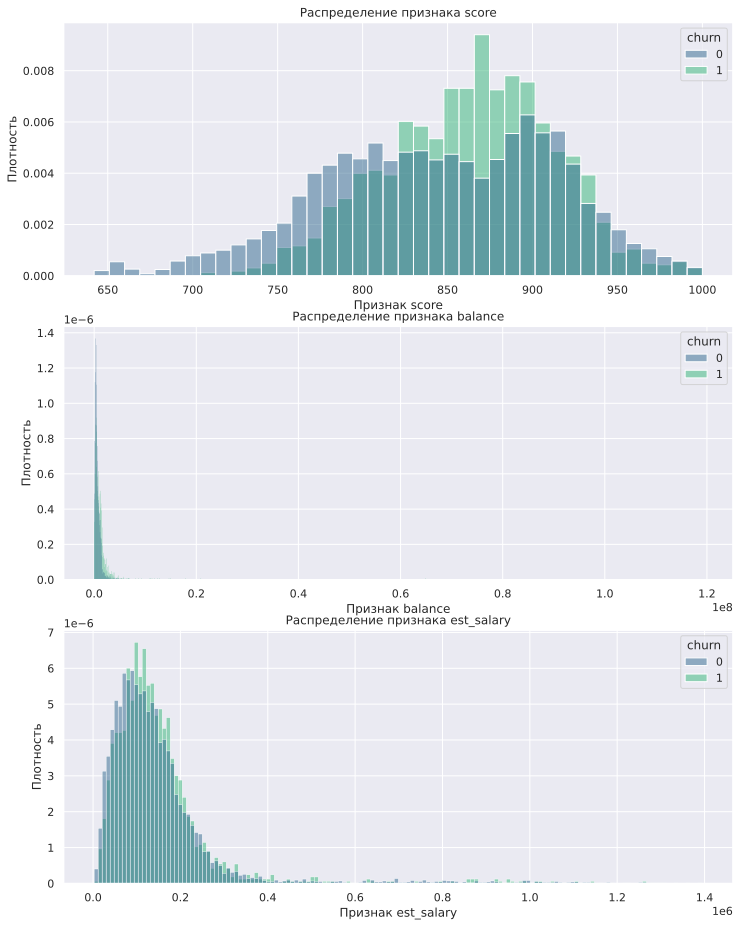

In [41]:
columns_hist = ['score', 'balance', 'est_salary']
# Построение гистограмм
plt.figure(figsize=(12, 55))
sns.set(style="darkgrid")

i = 1
for column in columns_hist:
    plt.subplot(10, 1, i)
    i += 1
    sns.histplot(data = df, hue ='churn', x=column, stat='density', common_norm=False, palette='viridis')
    plt.title(f'Распределение признака {column}')
    plt.ylabel('Плотность')
    plt.xlabel(f'Признак {column}')
    
plt.show()



По признакам balance и est_salary Наблюдаются очень длинные хвосты справа. По score есть небольшой хвост слева. Ограничим оси х, чтобы рассмотреть интересующие участки графиков подробнее. Сетку сделаем чаще.

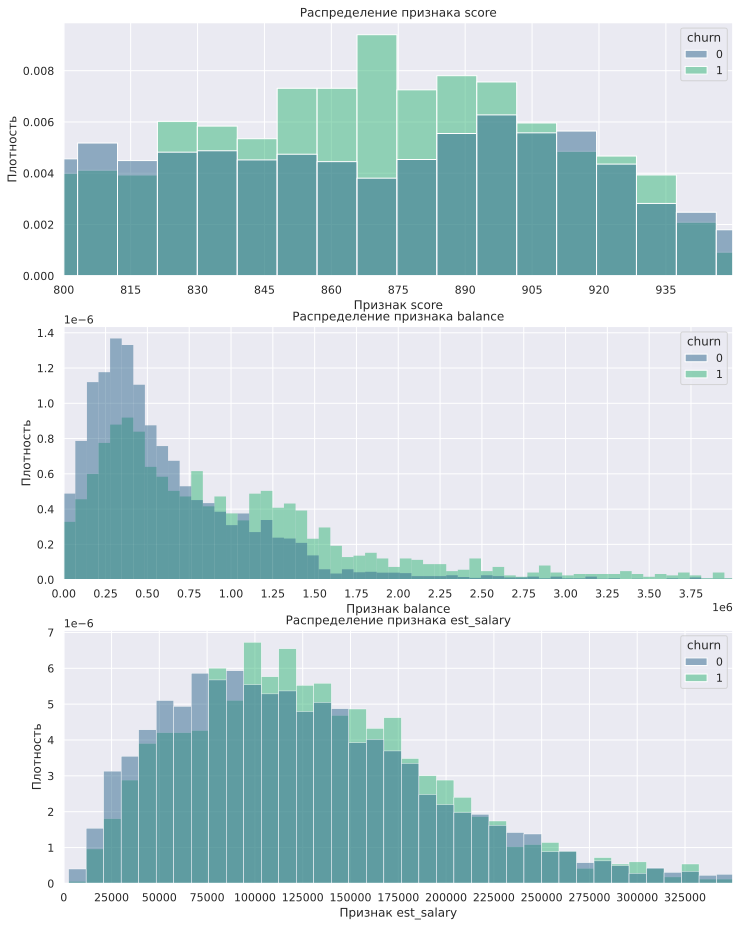

In [42]:
plt.figure(figsize=(12, 55))

i = 1
for column in columns_hist:
    plt.subplot(10, 1, i)
    i += 1
    sns.histplot(data = df, hue ='churn', x=column, stat='density', common_norm=False, palette='viridis')
    plt.title(f'Распределение признака {column}')
    plt.ylabel('Плотность')
    plt.xlabel(f'Признак {column}')
    if column =='balance':
        plt.xlim ([0, 4000000]),
        plt.xticks(np.arange(0, 4000000, 250000))
    if column =='est_salary':
        plt.xlim ([0, 350000]),
        plt.xticks(np.arange(0, 350000, 25000))
    if column == 'score':
        plt.xlim ([800, 950])
        plt.xticks(np.arange(800, 950, 15))
plt.show()

По данным признакам выделяютсяя следующие отточные интервалы.

Признак `score` отточный интервалы от 820 до 907 и 920 - 936. При сегментации возможно объединить диапазоны.

Признак `balance` 750 тыс. и больше.

Признак `est_salary` от 95 тыс до 210 тыс. Есть еще небольшие отточные интерваля в хвосте, но количество наблюдений по ним значительно меньше.

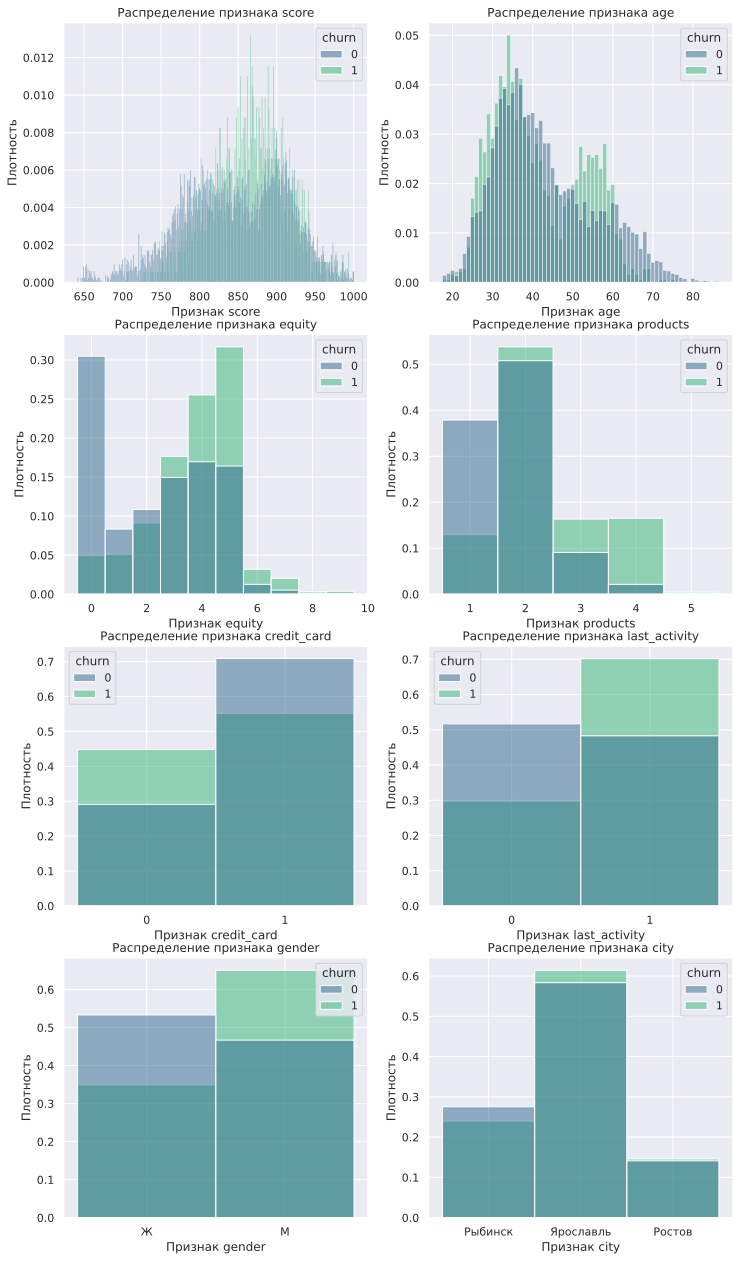

In [43]:
columns_cat = ['score', 'age', 'equity', 'products', 'credit_card', 'last_activity','gender', 'city']
# Построение гистограмм
plt.figure(figsize=(12, 22))
sns.set(style="darkgrid")

i = 1
for column in columns_cat:
    plt.subplot(4, 2, i)
    i += 1
    sns.histplot(data = df, hue ='churn', x=column, stat='density', common_norm=False, discrete = True, palette='viridis')
    plt.title(f'Распределение признака {column}')
    plt.ylabel('Плотность')
    plt.xlabel(f'Признак {column}')
    
    if column == 'credit_card' or column == 'last_activity':
        plt.xticks(np.arange(0, 2, 1))
plt.show()

 Ограничим ось х для графика признака score, чтобы рассмотреть интересующие участки графиков подробнее.

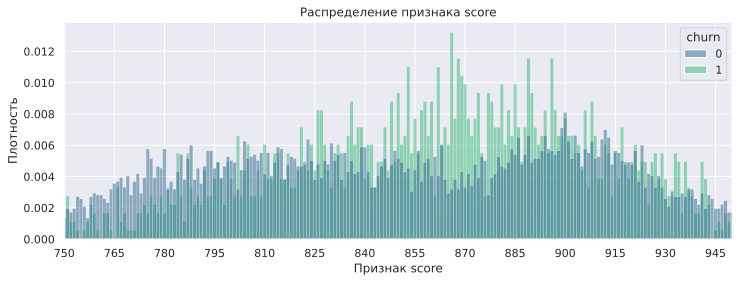

In [44]:
plt.figure(figsize=(12, 4))
sns.histplot(data = df, hue ='churn', x='score', stat='density', common_norm=False, discrete = True, palette='viridis')
plt.title('Распределение признака score')
plt.ylabel('Плотность')
plt.xlabel('Признак score')
    
plt.xlim ([750, 950]),
plt.xticks(np.arange(750, 950, 15))
plt.show()

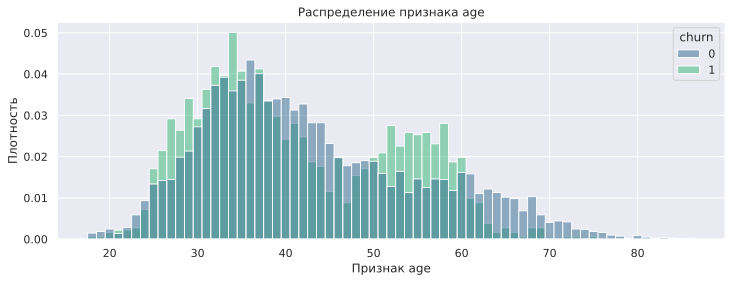

In [45]:
plt.figure(figsize=(12, 4))
sns.histplot(data = df, hue ='churn', x='age', stat='density', common_norm=False, discrete = True, palette='viridis')
plt.title('Распределение признака age')
plt.ylabel('Плотность')
plt.xlabel('Признак age')
    
plt.show()

Картина по признаку `score` в целом совпадает с графиком по укрупненным корзинам. Отточные интервалы 820-910 и 920-940.

По остальным признакам выделяютсяя следующие отточные интервалы.

Признак `age` отточный интервалы от 25 до 35 лет и от 50 до 60 лет.

Признак `equity` отточный интерват от 3 баллов собственности и больше.

Признак `products` отточные клиенты владеют двумя и более продуктами.

Признак `credit_card` к оттоку более склонны клиенты без кредитной карты.

Признак `last_activity` активные клиенты более склонны к оттоку.

Признак `gender` мужчины более склонны к оттоку, женщины более консервативны.

Признак `city` клиенты Ярославля и Ростова более склонны к оттоку.


### Портреты клиентов, склонных к оттоку и нет

Соберем в единую таблицу средние показатели признаков в разрезе оттока.

In [46]:
# Сводная таблица с расчетом показателей
portrait = (df.pivot_table(
               columns='churn',
               values=['score', 'balance', 'est_salary', 
                       'age', 'equity', 'products', 'credit_card', 'last_activity',
                      'city', 'gender'] ,
               aggfunc={'score': 'median', 
                        'balance': ['mean' , 'median'],
                        'est_salary': ['mean' , 'median'],
                        'age' :'median', 
                        'equity': 'median', 
                        'products': 'median', 
                        'credit_card': 'median', 
                        'last_activity': 'median', 
                        'city': calculate_mode, 
                        'gender': calculate_mode})
            
            
        )
# Переименование признаков и названий показателей
portrait.rename(index={'age':'Возраст', 
                       'balance':'Баланс',
                       'city': 'Город',
                       'credit_card': 'Наличие кредитной карты',
                       'equity': 'Колличество баллов собственности',
                      'est_salary': 'Оценочный доход',
                      'gender': 'Пол',
                      'last_activity': 'Активность',
                      'products': 'Количество продуктов',
                      'score': 'Количество баллов собственности',
                      'mean': 'среднее значение',
                       'median': 'медианное значение',
                       'calculate_mode': 'мода'
                      },
                
                inplace=True)

# Переименование столбцов
portrait.columns = ['Не отток', 'Отток']

# Отображение дробных значений с точностью до двух знаков после запятой
pd.set_option('display.float_format', '{: .2f}'.format)

portrait

Не отток       Отток
Возраст                          медианное значение         40          39
Баланс                           среднее значение    733031.63  1134458.21
                                 медианное значение  475410.09   783908.90
Город                            мода                Ярославль   Ярославль
Наличие кредитной карты          медианное значение          1           1
Колличество баллов собственности медианное значение          3           4
Оценочный доход                  среднее значение    147674.64   148357.48
                                 медианное значение  118227.60   125408.88
Пол                              мода                        Ж           М
Активность                       медианное значение          0           1
Количество продуктов             медианное значение          2           2
Количество баллов собственности  медианное значение        848         866

**Портрет клиента, склонного к оттоку**

Мужчина в возрасте около 39 лет, активный клиент филиала в г.Ярославль, имеющий кредитную карту в банке, а также пользующийся другими продуктами банка. Клиент качественный, бал кредитного скоринга около 866, его собственность оценивается в 4 балла, средний доход 148 357.48, баланс 1 134 458.21, что выше, чем у неотточных клиентов. Медианные значения дохода и баланса ниже средних, что связано с аномально высокими доходами и балансом некоторых клиентов.

**Портрет клиента, НЕ склонного к оттоку**

Женщина в возрасте около 40 лет. Не является активным клиентом банка, имеет кредитную карту банка. Обслуживается в филиале банка в г.Ярославль. Количество баллов собственности 3. Средний доход 147 674.64, балланс по счету 733 031.63. Количество баллов кредитного скорринга 848, что ниже, чем у отточных клиентов. Медианный доход и медианное значение баланса неотточных клиентов также ниже, чем у отточных.


### Матрица корреляций Пирсона

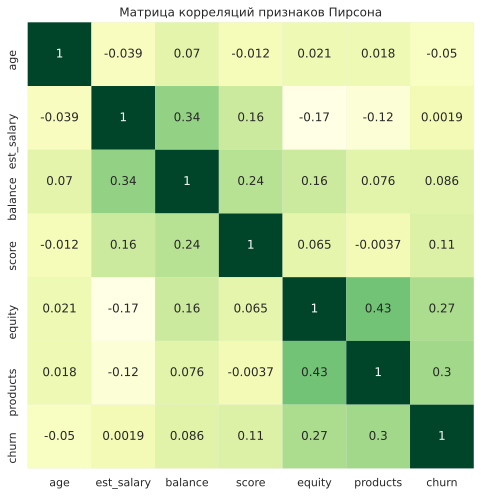

In [47]:
# Нарисуем тепловую карту с подписями для матрицы корреляций и отобразим на ней значения коэффициентов корреляции Пирсона
plt.figure(figsize=(8, 10))
sns.heatmap(df[['age', 'est_salary', 'balance', 'score', 'equity', 'products', 'churn']]
            .corr(), 
            annot = True, 
            square = True,  
            cmap='YlGn', 
            cbar=False
           )
plt.title('Матрица корреляций признаков Пирсона')
plt.show()

Наибольшая прямая корреляция (0,43) наблюдается между количеством продуктов и количеством баллов собственности.

Также закономерна взаимосвязь баланса и дохода клиента (0,34).

Наблюдается корреляция оттока с количетсвом продуктов (0,3) и с колличеством баллов собственности (0,27), а также слабая корреляция с баллами кредитного скоринга (0,11)

Кроме того, отмечается отрицательная корреляция дохода и баллов собственности (-0,17), дохода и количества продуктов(-0,12).

Можно отметить еще небольшую положительную корреляция между балансом и баллами кредитного скорринга (0,24). Еще более слабая связь между баллами собственности и балансом (0,16).

Остальные коэффициенты корреляции слишком малы.

Выделим отдельно корреляции для `churn`.

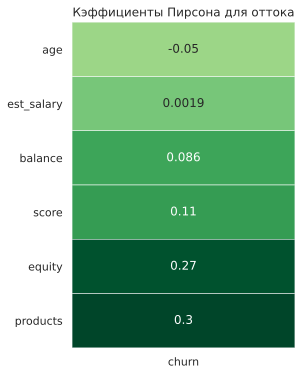

In [48]:
# Коэффициенты Пирсона для 'churn'

plt.figure(figsize=(4, 6))
sns.heatmap(df[['age', 'est_salary', 'balance', 'score', 'equity', 'products', 'churn']]
            .corr().loc[:,['churn']]
            .drop('churn')
            .sort_values('churn'), 
            annot=True,
            cmap='YlGn', 
            center=0,
            cbar=False,
            linewidths=.5)
plt.title('Кэффициенты Пирсона для оттока')
plt.show()

Для оценки силы связи в теории корреляции применяется шкала английского статистика Чеддока: слабая — от 0,1 до 0,3; умеренная — от 0,3 до 0,5; заметная — от 0,5 до 0,7; высокая — от 0,7 до 0,9; весьма высокая (сильная) — от 0,9 до 1,0. 

Таким образом, слабая корреляция оттока наблюдается с количеством используемых продуктов (0,3) и количеством баллов собственности (0,27), а такжес баллами кредитного скорринга (0,11). 

### Корреляция  Phi_K

Фик (𝜙k) — это новый и практичный коэффициент корреляции, который работает согласованно между категориальными, порядковыми и интервальными переменными, учитывает нелинейную зависимость и возвращается к коэффициенту корреляции Пирсона в случае двумерного нормального распределения входных данных.

Так как наш набор данных содержит как числовые, так и категориальные признаки, проанализируем корреляцию между ними с помощью Phik ( 𝜙 k). 

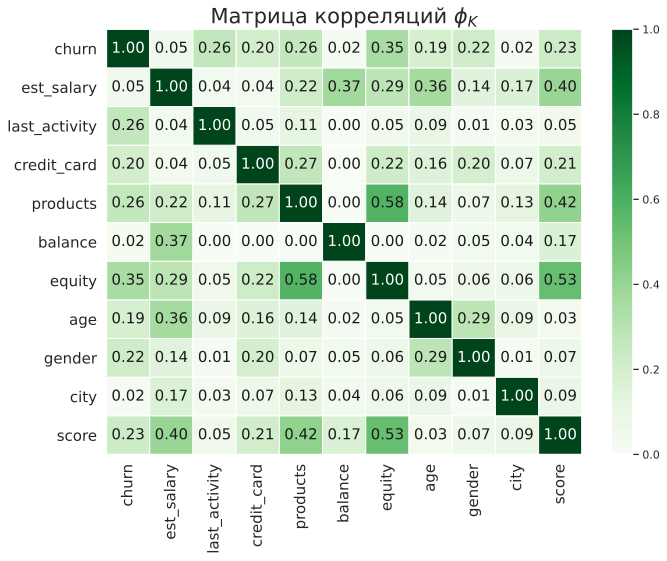

In [49]:

interval_cols = ['balance', 'est_salary', 'age', 'score']
phik = df.phik_matrix(interval_cols=interval_cols)


plot_correlation_matrix(phik.values, 
                        x_labels=phik.columns, 
                        y_labels=phik.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"Матрица корреляций $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.tight_layout()

Коэффициент 𝜙 не дает указаний на направление связи, зато обнаруживает и нелинейные взаимосвязи. 

Наибольшие коэффициаент корреляции между парами показателей `equity` и `products` (коэффициент корреляции 0,58), а также  `equity` и `score` (0,53). Немного меньшая зависимость между `products` и `score` (0,42), а также `score` и `est_salary` (0,4). Кроме того, наблюдается корреляция между `est_salary` и такими показателями, как: `age` (0,36), `balance` (0,37), `equity` (0,29), `products`(0,22).

Пол больше всего коррелирует с возрастом. Коэффициент корреляции составляет 0,29.
Для большей наглядности выведем отдельным столбцом коэффициенты корреляции для оттока в порядке возрастания.

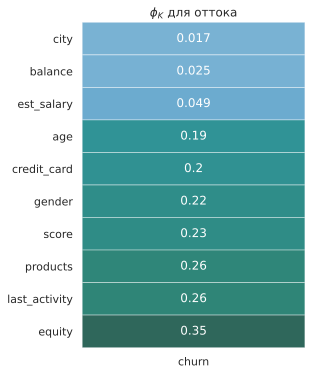

In [50]:
# Выделим отдельно phik для 'churn'
churn_phik = phik['churn']

plt.figure(figsize=(4, 6))
sns.heatmap(phik.loc[:,['churn']].drop('churn')
            .sort_values('churn'), 
            annot=True,
            cmap='PuBuGn',
            center=0,
            cbar=False,
            linewidths=.5,
           alpha =0.8)
plt.title('$\phi_K$ для оттока')
plt.show()

Согласно шкале Чеддока, умеренная корреляция оттока наблюдается лишь с количеством баллов собственности `equity` (0,35).

По таким показателям, как `last_activity` (0,26), `products` (0,26), `score`(0,23), `gender`(0,22), `credit card`(0,2) и `age`(0,19) - корреляция слабая. С остальными показателя взаимосвязь несущественна. Частично картина совпадает с корреляцией Пирсона.
 
При оценке корреляций следует обращать внимание не только на коэффициенты, но и на их статистическую значимость. Потому что большая корреляция может оказаться статистически незначимой, и наоборот. 

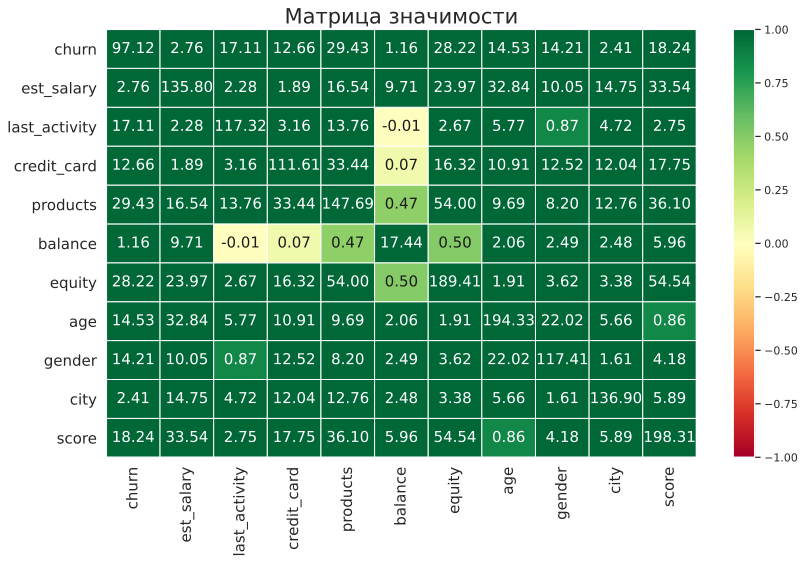

In [51]:
# Матрица значимости
significance_overview = (df[['score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn']]
                         .significance_matrix(interval_cols=interval_cols)
                        )
plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                         title="Матрица значимости", 
                        usetex=False, fontsize_factor=1.5, figsize=(12, 8))
plt.tight_layout()

Большинство рассчитанных коэффициентов кореляции являются статистически значимыми, кроме тех, по которым коэффициенты кореляции равны нулю. А также две пары признаков менее значимы: `gender` и `last_activity`, `score` и `age`, но по ним и корреляция была очень-очень слабой.

Как видно из матрицы, для показателя оттока наибольшую значимость имеют количество продуктов, которым пользуется клиент `products` и количество баллов собственности `equity`. Чуть меньшее значение имеют `last_activity` , `score`, `gender`, `credit card` и `age`. 

**Вывод по разделу**

Диапазон баллов кредитного скоринга клиентов от 642 до 1000. Средний балл равен 848,67, что почти совпадает с медианным значением в 853. Большинство клиентов набирают от 802 до 900 баллов кредитного скоринга.

Возраст клиентов варьируется от 18 до 86. Большинство клиентов банка - люди в возрасте от 33 лет до 51 года. Средний и медианный возраст почти совпадают - около 40 лет. 

Количество баллов собственности у клиентов от 0 до 9, у основной массы клиентов - не больше 4, чаще всего 3.

Баланс на счете клиентов датасета от 0 до 119 млн, у основной массы клиентов - менее 1 млн. По данному показателю среднее и медианное значения отличаются значительно: медианное значение - около 500 тыс, среднее - 800 тыс. Такое различие связано с частью клиентов, имеющих большой остаток по счету (выбросы), за счет которых происходит сдвиг среднего в большую сторону. Разброс значений по данному показателю большой, стандартное отклонение составляет почти 2 млн.

Количеству продуктов, которыми пользуется клиент могут доходить до 5, большинство клиентов пользуются двумя продуктами, это же количество является средним и медианным значением.

Большинство клиентов банка имеют кредитные карты (68%) и являются активными клиентами (52%).

Оценочный доход клиента согласно данным датасета варьируется от 2,5 тыс до 1,4 млн. Доход большей части клиентов попадает в диапазон от 75 тыс до 174,5 тыс. За счет клиентов с высокими доходами среднее значение (147,8 тыс) ощутимо выше медианного (119,6 тыс). Стандартное отклонение большое - более 139 тыс.

Больше всего клиентов в Ярославле. Мужчин и женщин примерно равное количество.

Доля активных клиентов - 52%.

Средний отток по банку составляет 18%.

***Портрет клиента, склонного к оттоку***

Мужчина в возрасте около 39 лет, активный клиент филиала в г.Ярославль, имеющий кредитную карту в банке, а также пользующийся другими продуктами банка. Клиент качественный, бал кредитного скоринга около 866, его собственность оценивается в 4 балла, средний доход 148 357.48, баланс 1 134 458.21, что выше, чем у неотточных клиентов. Медианные значения дохода и баланса ниже средних, что связано с аномально высокими доходами и балансом некоторых клиентов.

***Портрет клиента, НЕ склонного к оттоку***

Женщина в возрасте около 40 лет. Не является активным клиентом банка, имеет кредитную карту банка. Обслуживается в филиале банка в г.Ярославль. Количество баллов собственности 3. Средний доход 147 674.64, балланс по счету 733 031.63. Количество баллов кредитного скорринга 848, что ниже, чем у отточных клиентов. Медианный доход и медианное значение баланса неотточных клиентов также ниже, чем у отточных.

На нормализованных гистограммах по признакам balance и est_salary наблюдаются очень длинные хвосты справа, поэтому и средние значения по этим признакам больше медианных.  

***Отточные интервалы:***
Признак score в целом совпадает отточные интервалы 820-910 и 920-940.

Признак age отточный интервалы от 25 до 35 лет и от 50 до 60 лет.

Признак equity отточный интерват от 3 баллов собственности и больше.

Признак products отточные клиенты владеют двумя и более продуктами.

Признак credit_card к оттоку более склонны клиенты без кредитной карты.

Признак last_activity активные клиенты более склонны к оттоку.

Признак gender мужчины более склонны к оттоку, женщины более консервативны.

Признак city клиенты Ярославля и Ростова более склонны к оттоку.

для показателя оттока наибольшую значимость имеют количество продуктов, которым пользуется клиент products и количество баллов собственности equity. Чуть меньшее значение имеют last_activity , score, gender, credit card и age.

Согласно шкале Чеддока, умеренная корреляция оттока наблюдается лишь с количеством баллов собственности equity. По таким показателям, как last_activity, products, score, gender, credit card и age - корреляция слабая. С остальными показателя взаимосвязь несущественна.

## Проверка статистических гипотез

Разделим на отдельные датасеты информацию об ушедших клиентах и оставшихся.

In [52]:
#Датасет по ушедшим клиентам
df_churned = df.query('churn == 1')
display(df_churned.info())

#Датасет по оставшимся
df_stayed = df.query('churn == 0')
df_stayed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1818 entries, 0 to 9994
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   score          1818 non-null   int64  
 1   city           1818 non-null   object 
 2   gender         1818 non-null   object 
 3   age            1818 non-null   int64  
 4   equity         1818 non-null   int64  
 5   balance        1806 non-null   float64
 6   products       1818 non-null   int64  
 7   credit_card    1818 non-null   int64  
 8   last_activity  1818 non-null   int64  
 9   est_salary     1818 non-null   float64
 10  churn          1818 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 170.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8155 entries, 1 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   score          8155 non-null   int64  
 1   city           8155 non-null   object 
 2   gender         8155 non-null   object 
 3   age            8155 non-null   int64  
 4   equity         8155 non-null   int64  
 5   balance        5889 non-null   float64
 6   products       8155 non-null   int64  
 7   credit_card    8155 non-null   int64  
 8   last_activity  8155 non-null   int64  
 9   est_salary     8155 non-null   float64
 10  churn          8155 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 764.5+ KB


In [53]:
# Сравним количество строк в неразделенном датасете и двух новых
df_rows_count_after - (df_churned.shape[0] + df_stayed.shape[0])

0

Все столбцы на месте, строки не потерялись при разделении датафреймов.

### Проверка гипотезы различия дохода между теми клиентами, которые ушли и теми, которые остались.

Гипотеза H0: Средний доход ушедших клиентов равен среднему доходу оставшихся (средние значения совокупностей равны).

Альтернативная гипотеза H1: Средний доход ушедших клиентов отличается от среднего дохода оставшихся.

In [54]:
# Функция для проверки распределения на нормальность при уровне статистической значимости 0,05
def shapiro_test(data, alpha = 0.05):
    stat, p = st.shapiro(data)
    print('p-значение: ', p)
    if p > alpha:
        print('Распределение нормально')
    else:
        print('Распределение не нормально')

In [55]:
#Проверка нормальности распределения дохода в группе отточных клиентов
shapiro_test(df_churned['est_salary'])

p-значение:  0.0
Распределение не нормально


In [56]:
#Проверка нормальности распределения дохода в группе оставшихся клиентов
shapiro_test(df_stayed['est_salary'])

p-значение:  0.0
Распределение не нормально


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Распределения не являются нормальными, для проверки гипотез необходимо использовать тест Мана-Уитни.

In [57]:
#Функция для применения теста Уилкоксона-Манна-Уитни при уровне статистической значимости 0,05
def mannw_test (data_1, data_2, alpha = 0.05):
    results = st.mannwhitneyu(data_1, data_2)
    print('p-значение: ', results.pvalue)

    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу: разница статистически значима')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 
    


In [58]:
# Проверка гипотезы тестом Уилкоксона-Манна-Уитни
mannw_test(df_churned['est_salary'], df_stayed['est_salary'])

p-значение:  0.00016830729188229058
Отвергаем нулевую гипотезу: разница статистически значима


Так как pvalue меньше уровня статистической значимости, то с очень высокой степенью уверенности можно сказать, что разница в средних доходах ушедших клиентов и оставшихся статистически значима. Нулевую гипотезу о равенстве доходов отвергаем.

### Проверка гипотезы о различии возраста между теми клиентами, которые ушли и теми, которые остались

Гипотеза H0: Средний возраст ушедших клиентов равен среднему возрасту оставшихся.

Альтернативная гипотеза H1: Средний возраст ушедших клиентов не равен среднему возрасту оставшихся.

In [59]:
#Проверка нормальности распределения возраста в группе отточных клиентов
shapiro_test(df_churned['age'])

p-значение:  6.457381867311257e-24
Распределение не нормально


Как ни странно, но распределение возраста в группе ушедших клиентов не является нормальным

In [60]:
#Проверка нормальности распределения возраста в группе оставшихся клиентов
shapiro_test(df_stayed['age'])

p-значение:  2.1159606811304738e-43
Распределение не нормально


В группе оставшихся клиентов распределение возраста также не является нормальным. Применяем тест Уилкоксона-Манна-Уитни.

In [61]:
# Проверка гипотезы тестом Уилкоксона-Манна-Уитни
mannw_test(df_churned['age'], df_stayed['age'])

p-значение:  3.811912767980522e-06
Отвергаем нулевую гипотезу: разница статистически значима


P-value сильно меньше уровня статистической значимости, нулевую гипотезу о равенстве среднего возраста в группе ушедших и оставшихся клиентов, отвергаем. С очень высокой степенью уверенности можно сказать, что средние значения двух совокупностей различаются статистически значимо.

### Проверка гипотезы о различии баланса на счете между теми клиентами, которые ушли и теми, которые остались

Гипотеза H0: Средний баланс счета ушедших клиентов равен среднему балансу счета оставшихся.

Альтернативная гипотеза H1: Средний баланс счета ушедших клиентов не равен среднему балансу оставшихся.

In [62]:
#Проверка нормальности распределения баланса в группе отточных клиентов
shapiro_test(df_churned['balance'])

p-значение:  1.0
Распределение нормально


In [63]:
#Проверка нормальности распределения баланса в группе оставшихся клиентов
shapiro_test(df_stayed['balance'])

p-значение:  1.0
Распределение нормально


В данном случае распределения нормальны, будем использовать двухвыборочный тест для независимых выборок scipy.stats.ttest_ind c alternative = 'two-sided' (по умолчанию). 

In [64]:
# задаём уровень значимости
alpha = 0.05

# проводим ttest для двух выборок, в качестве альтернативной используем двустороннюю гипотезу (по умолчанию)
result = st.ttest_ind(df_churned['balance'], df_stayed['balance'], nan_policy = 'omit')

print(f'p-value: {result.pvalue}')

# проверяем p-value
if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 4.376419027207452e-14
Отвергаем нулевую гипотезу


P-value сильно меньше уровня статистической значимости, нулевую гипотезу о равенстве среднего баланса счетов ушедших и оставшихся клиентов отвергаем. С очень высокой степенью уверенности можно сказать, что средние значения двух совокупностей различаются статистически значимо.

### Проверка гипотезы о различии в количестве продуктов, которыми пользуются/пользовались ушедшие и оставшиеся клиенты.

Гипотеза H0: Среднее количество продуктов банка, которыми пользовались ушедшие клиенты, равно среднему количеству продуктов, которыми пользуются оставшиеся клиенты.

Альтернативная гипотеза H1: Среднее количество продуктов банка, которыми пользовались ушедшие клиенты не равно среднему среднему количеству продуктов, которыми пользуются оставшиеся клиенты.

In [65]:
#Проверка нормальности распределения количества продуктов в группе отточных клиентов
shapiro_test(df_churned['products'])

p-значение:  2.4491334040083423e-40
Распределение не нормально


In [66]:
#Проверка нормальности распределения баланса в группе оставшихся клиентов
shapiro_test(df_stayed['products'])

p-значение:  0.0
Распределение не нормально


Нельзя сказать, что распределения нормальны, поэтому для проверки гипотез используем тест Манна-Уитни.

In [67]:
# Проверка гипотезы тестом Уилкоксона-Манна-Уитни
mannw_test(df_churned['products'], df_stayed['products'])

p-значение:  1.1812726611971905e-161
Отвергаем нулевую гипотезу: разница статистически значима


P-value сильно меньше уровня статистической значимости, нулевую гипотезу о равенстве в количестве продуктов в группе ушедших и оставшихся клиентов, отвергаем. С очень высокой степенью уверенности можно сказать, что средние значения двух совокупностей различаются статистически значимо.

**Вывод**

Из рассмотренных в этом разделе показателей только данные по `balance` распределены нормально, и для проверки гипотезы о равенстве баланса у ушедших и оставшихся клиентов использовался ttest ind.

По остальным показателям распределения не являются нормальными, поэтому для их проверки  использовался тест Уилкоксона-Манна-Уитни.

В результате проверок все нулевые гипотезы отвернуты. С высокой степенью уверенности можно сказать, что средние значения дохода, возраста, баланса, количества продуктов у ушедших клиентов и оставшихся отличаются статистически значимо.

## Сегментация на основе стратегических показателей, значимых признаков отточности

### Выделение сегментов

In [68]:
print('Средняя доля оттока по банку:', df['churn'].mean() * 100, '%')

Средняя доля оттока по банку: 18.229218891005715 %


Средний отток по банку равен 18%. Попробуем выделить сегменты, по которым отточность существенно выше. В предыдущем разделе выяснили, что различия в доходе, возрасте, балансе и количестве продуктов значимо. 

Ранее было определено, что наибольшая корреляция оттока наблюдается со следующими показателями: equity (0,35), last_activity (0,26), products (0,26), score(0,23), gender(0,22), credit card(0,2) и age(0,19), среди которых наибольшую значимость имеют products и equity, но products и equity коррелируют между собой.

Кроме того, будем учитывать выделенные в разделе 3 высокоотточные интервалы:

`balance` 750 тыс. и больше,

`est_salary` от 95 тыс до 210 тыс,

`score`  820-910 и 920-940,

`age` от 25 до 35 лет и от 50 до 60 лет,

`equity` от 3 баллов собственности и больше,

`products` отточные клиенты владеют двумя и более продуктами,

`credit_card` к оттоку более склонны клиенты без кредитной карты,

`last_activity` активные клиенты более склонны к оттоку,

`gender` мужчины более склонны к оттоку, женщины более консервативны,

`city` клиенты Ярославля и Ростова более склонны к оттоку.

Попробуем скомпоновать между собой признаки, значительно влияющие на отток, но менее коррелирующие между собой.

In [69]:
# Функция для подсчета оттока и количества людей в сегменте, вывод в виде таблицы
def segment (data_query, segment_number):
    result = (data_query.agg({'churn': ['mean', 'sum', 'count']})
             .T
             .reset_index()
                         )
    result = result.replace('churn', f'Сегмент {segment_number}')
    result.columns = ['Сегмент', 'Отток', 'Кол-во ушедших клиентов', 'Кол-во клиентов в сегменте']
    return result
   

In [70]:
segment_1 = segment(df.query('gender =="М" and balance >= 750000 and last_activity == 1'), 1)
segment_1

Сегмент  Отток  Кол-во ушедших клиентов  Кол-во клиентов в сегменте
0  Сегмент 1   0.60                   423.00                      706.00

 Хороший сегмент из активных клиентов банка мужского пола с балансом от 750 тыс. Численность сегмента 706 чел. Отток почти 60%. 

In [71]:
segment_2 = segment(df.query('gender =="М" and  credit_card == 0 and last_activity == 1'), 2)
segment_2

Сегмент  Отток  Кол-во ушедших клиентов  Кол-во клиентов в сегменте
0  Сегмент 2   0.42                   302.00                      718.00

Сегмент 2 - 718 активных клиентов банка мужского пола, не имеющих кредитной карты. Отток - 42%.

In [72]:
segment_3 = segment(df.query('gender == "М" and products >=2 and balance >= 750000'), 3)
segment_3

Сегмент  Отток  Кол-во ушедших клиентов  Кол-во клиентов в сегменте
0  Сегмент 3   0.48                   571.00                     1188.00

Сегмент 3 - 1188 мужчин, пользующихся двумя и более продуктами банка и имеющими баланс от 750 тыс. Отток - 48%.

In [73]:
segment_4 = segment (df.query('820 <= score <= 940 and gender == "М" and balance >= 750000'), 4)
segment_4

Сегмент  Отток  Кол-во ушедших клиентов  Кол-во клиентов в сегменте
0  Сегмент 4   0.52                   511.00                      989.00

Сегмент 4 - 989 мужчин с балансом от 750 тыс. и баллами кредитного скоринга от 820 до 940. Отток более 50%

In [74]:
segment_5 = segment(df.query('820 <= score <= 940 and gender == "М" and last_activity == 1'), 5)
segment_5

Сегмент  Отток  Кол-во ушедших клиентов  Кол-во клиентов в сегменте
0  Сегмент 5   0.41                   600.00                     1477.00

Сегмент 5 - 1477 активных клиентов банка мужского пола с суммой баллов кредитного скоринга от 820 до 940. Отток почти 41%

In [75]:
segment_6 = segment(df.query('820 <= score <= 940 and equity >= 3 and last_activity == 1'), 6)
segment_6

Сегмент  Отток  Кол-во ушедших клиентов  Кол-во клиентов в сегменте
0  Сегмент 6   0.48                   909.00                     1876.00

Сегмент 6 - 1876 активных клиентов банка с количеством баллов собственности от трех и суммой баллов кредитного скоринга от 820 до 940. Отток 48%.

In [76]:
segment_7 = segment(df.query('820 <= score <= 940 and balance >= 750000 and credit_card == 0'), 7)
segment_7

Сегмент  Отток  Кол-во ушедших клиентов  Кол-во клиентов в сегменте
0  Сегмент 7   0.49                   446.00                      910.00

Сегмент 7 - 910 чел., не оформивших кредитную карту банка, имеющих балланс на счете от 750 тыс. и сумму баллов кредитного скоринга от 820 до 940. Отток 49%.

In [77]:
segment_8 = segment(df.query('products >= 2 and balance >= 750000 and credit_card == 0'), 8)
segment_8

Сегмент  Отток  Кол-во ушедших клиентов  Кол-во клиентов в сегменте
0  Сегмент 8   0.42                   508.00                     1196.00

Сегмент 8 - 1196 чел, не оформивших кредитную карту банка, но пользующихся двумя и более услугами банка и имеющих балланс на счете от 750 тыс. Отток чуть более 42%.

In [78]:
segment_9 = segment(df.query('25 <= age <= 35 and equity >= 3 and credit_card == 0'), 9)
segment_9

Сегмент  Отток  Кол-во ушедших клиентов  Кол-во клиентов в сегменте
0  Сегмент 9   0.46                   265.00                      580.00

Сегмент 9 - Молодые клиенты банка в возрасте от 25 до 35 лет с количеством баллов собственности от 3, не офоромившие кредитную карту. Численность сегмента - 580 чел. Отток почти 46%.

In [79]:
segment_10 = segment(df.query('25 <= age <= 35 and equity >= 3 and balance >= 750000'), 10)
segment_10

Сегмент  Отток  Кол-во ушедших клиентов  Кол-во клиентов в сегменте
0  Сегмент 10   0.50                   288.00                      578.00

Сегмент 10 - Молодые клиенты банка в возрасте от 25 до 35 лет с количеством баллов собственности от 3 и балансом счета от 750 тыс. Таких клиентов 578 чел. Отток почти 50%.

Несмотря на то, что по шкале Чеддока корреляция оттока с балансом была несущественна, как по кореляции пирсона, так и по 𝜙 k, практические расчеты показали, что при выдедении сегментов с уччетом показателя баланса, отток выше. Возможно, на рассчет коэффициентов кореляции повлияли выбросы.

### Приоретизация сегментов

Сегментов, по которым отток значительно выше, чем по банку в целом, можно выделить достаточно много. Необходимо их приоретизировать, чтобы понимать, с какими клиентами работать в первую очередь. Критерием в данном вопросе будет уровень оттока - в первую очередь нужно работать с той группой людей, в которой больше всего желающих уйти.

In [80]:
segments = (pd.concat([segment_1, segment_2, segment_3, segment_4, segment_5, 
                      segment_6, segment_7, segment_8, segment_9, segment_10], axis=0)
            .sort_values(by='Отток', ascending=False)
            .reset_index()
           )
del segments['index']

# Заменим на целочисленный тип данных в столбцах данных о баллах кредитного скоринга и возраста
segments[['Кол-во ушедших клиентов', 'Кол-во клиентов в сегменте']] = (
    segments[['Кол-во ушедших клиентов', 'Кол-во клиентов в сегменте']].astype('int')
)

segments.style.format({'Отток':'{:.2%}'})

Во всех выделенных десяти сегментах отток превышает средний по банку более, чем в два раза. Самый большой отток в:

***Сегменте 1***

Мужчины, активные клиенты банка, с балансом от 750 тыс. Количество клиентов в сегменте - 706 чел, из них ушедших 423. Отток 59,92%.

***Сегменте 4***

Мужчины с балансом от 750 тыс. и баллами кредитного скоринга от 820 до 940. Количество человек в сегменте - 989, из них ушедших 511. Отток 51,67%

***Сегменте 10***

Молодые клиенты в возрасте от 25 до 35 лет с балансом от 750 тыс. и количеством баллов собственности от 3. Количество человек в сегменте 578, из них ушло 288. Отток 49,83%. 

Думаю, банку таких клиентов совсем не хотелось бы терять.

## Выводы и рекомендации (конкретные, по конкретным сегментам) для заказчика

### Выводы

Для анализа был предоставлен датасет о клиентах трех филиалов регионального банка. В датасете 10 000 строк, 12 столбцов. Обнаружены пропуски данных в двух столбцах balance и age. В balance пропусков почти 23%, что много. Дубликатов строк не обнаружено.

Строки с пропусками в столбце age удалены, строки с пропусками в столбце balance оставлены. Большинство строк с отсутствующим балансом - действующие клиенты, в том числе активные и имеющие кредитные карты. Прирора пропусков скорее всего техническая. Удалена строка с данными о клиенте, по которому указано количество продуктов 0, т.к., если клиент является клиентом банка, он должен пользоваться хотя бы одним продуктом банка.

Обнаружены неполные дубликаты по userid. Все дубликаты по userid из Ярославля и Рыбинска. Дубликаты по userid не являются дубликатами клиентов, т.к. большинство пар различаются по полу и возрасту. В каждой паре дубликатов один клиент действующий, а другой ушедший. По всей видимости банк присваивает id ушедших клиентов новым в другом филиале. Насколько это нормально с точки зрения учета необходимо уточнить в бэк-офисе банка.

После предобработки осталось 9974 строки, что составляет более 99% изначальных данных, что достаточно для анализа.

Диапазон баллов кредитного скоринга клиентов от 642 до 1000. Средний балл равен 848,67, что почти совпадает с медианным значением в 853. Большинство клиентов набирают от 802 до 900 баллов кредитного скоринга.

Возраст клиентов варьируется от 18 до 86. Большинство клиентов банка - люди в возрасте от 33 лет до 51 года. Средний и медианный возраст - около 40 лет. 

Количество баллов собственности у клиентов от 0 до 9, у основной массы клиентов - не больше 4, чаще всего 3.

Баланс на счете клиентов датасета от 0 до 119 млн, у основной массы клиентов - менее 1 млн. По данному показателю среднее и медианное значения отличаются значительно: медианное значение - около 500 тыс, среднее - 800 тыс. Такое различие связано с частью клиентов, имеющих большой остаток по счету (выбросы), за счет которых происходит сдвиг среднего в большую сторону. Разброс значений по данному показателю большой, стандартное отклонение составляет почти 2 млн.

Количеству продуктов, которыми пользуется клиент могут доходить до 5, большинство клиентов пользуются двумя продуктами, это же количество является средним и медианным значением.

Большинство клиентов банка имеют кредитные карты (68%) и являются активными клиентами (52%).

Оценочный доход клиента согласно данным датасета варьируется от 2,5 тыс до 1,4 млн. Доход большей части клиентов попадает в диапазон от 75 тыс до 174,5 тыс. За счет клиентов с высокими доходами среднее значение (147,8 тыс) ощутимо выше медианного (119,6 тыс).

Больше всего клиентов в Ярославле. Мужчин и женщин примерно равное количество.

Доля активных клиентов - 52%.

Средний отток по банку составляет 18%.

***Портрет клиента, склонного к оттоку***

Мужчина в возрасте около 39 лет, активный клиент филиала в г.Ярославль, имеющий кредитную карту в банке, а также пользующийся другими продуктами банка. Клиент качественный, бал кредитного скоринга около 866, его собственность оценивается в 4 балла, средний доход 148 357.48, баланс 1 134 458.21, что выше, чем у неотточных клиентов. Медианные значения дохода и баланса ниже средних, что связано с аномально высокими доходами и балансом некоторых клиентов.

***Портрет клиента, НЕ склонного к оттоку***

Женщина в возрасте около 40 лет. Не является активным клиентом банка, имеет кредитную карту банка. Обслуживается в филиале банка в г.Ярославль. Количество баллов собственности 3. Средний доход 147 674.64, балланс по счету 733 031.63. Количество баллов кредитного скорринга 848, что ниже, чем у отточных клиентов. Медианный доход и медианное значение баланса неотточных клиентов также ниже, чем у отточных.

То, что и отточные и оставшиеся клиенты обслуживаются преимущественно в филиале Ярославля, объясняется тем, что в данном филиале обслуживается больше половины клиентов банка.

На нормализованных гистограммах по признакам balance и est_salary наблюдаются очень длинные хвосты справа, поэтому и средние значения по этим признакам больше медианных.  

***Отточные интервалы:***
Признак `score` отточные интервалы 820-910 и 920-940.

Признак `age` отточный интервалы от 25 до 35 лет и от 50 до 60 лет.

Признак `equity` отточный интерват от 3 баллов собственности и больше.

Признак `products` отточные клиенты владеют двумя и более продуктами.

Признак `credit_card` к оттоку более склонны клиенты без кредитной карты.

Признак `last_activity` активные клиенты более склонны к оттоку.

Признак `gender` мужчины более склонны к оттоку, женщины более консервативны.

Признак `city` клиенты Ярославля и Ростова более склонны к оттоку.

Для показателя оттока наибольшую значимость имеют количество продуктов, которым пользуется клиент products и количество баллов собственности equity. Чуть меньшее значение имеют last_activity , score, gender, credit card и age.

Согласно шкале Чеддока, умеренная корреляция оттока наблюдается лишь с количеством баллов собственности equity. По таким показателям, как last_activity, products, score, gender, credit card и age - корреляция слабая. С остальными показателя взаимосвязь несущественна.

В результате проверок гипотез, с высокой степенью уверенности можно сказать, что средние значения дохода, возраста, баланса, количества продуктов у ушедших клиентов и оставшихся отличаются статистически значимо.

На основе стратегических показателей, выделенных отточных интервалов, выявленной корреляции признаков, результатах проверки гипотез были выделены 10 высокоотточных сегментов с показателем оттока от 40.6% до почти 60%, что в несколько раз превышает средний отток по банку. Сегменты были приоретизированы по величине оттока. Наиболее отточные сегменты:

- Мужчины, активные клиенты банка, с балансом от 750 тыс. Количество клиентов в сегменте - 706 чел, из них ушедших 423. Отток 59,92%.

- Мужчины с балансом от 750 тыс. и баллами кредитного скоринга от 820 до 940. Количество человек в сегменте - 989, из них ушедших 511. Отток 51,67%

- Молодые клиенты в возрасте от 25 до 35 лет с балансом от 750 тыс. и количеством баллов собственности от 3. Количество человек в сегменте 578, из них ушло 288. Отток 49,83%.


### Рекомендации

В результате проведенного исследования и выявленных высокоотточных сегментов можно предложить следующие шаги по удержанию клиентов и снижению среднего оттока клиентов по банку:

- В первую очередь стоит обратить внимание на активных клиентов с баллансом от 750 тыс. Возможно, предложить особые условия обслуживания при достижении данной суммы на балансе. Хорошо бы, если бы эти условия больше подходили мужчинам, например, повышенный кешбэк по тем категориям, которые более интересны мужчинам, программу лояльности с тренажерным залом (не аэробика и не фитнес).
- Для неактивных клиентов банка - мужчин с балансом от 750 тыс. и кредитным скорингом от 820 до 940 также можно предлагать скидки и абонементы в тренажерный зал, более выгодные/индивидуальные условия обслуживания. Более адресные предложения можно было бы сделать, зная, какую дополнительную информацию данный банк включает в скоринг.
- Молодым состоятельным клиентам помимо тренажерного зала можно предложить ориентированные для данного сегмента категории кешбэка, ВИП-проходы в ночные клубы или на горнолыжные подъемники, спортивные магазины. (Горнолыжных комплекса по данным интернета в Ярославской области три). Кроме того, можно предлагать скидки и спецусловия при бронировании отелей. Также стоит пересмотреть программы страхования собственности, сделать их более привлекательными для данной категории клиентов.

Дополнительно, для более адресных предложений, рекомендуется изучить структуру расходов по картам, предложения банков-конкурентов для выделенных категорий клиентов.